# BTM Data science notebook

In this session we will use examples from https://github.com/pycam/python-data-science condensed down to a 1 hour session, to get familiar with pandas and classes. 


## Pandas 
Pandas is a data analysis module that allows you to use python with tables and data objects, much like data.frames in R.

Lets get started by opening a table and look at some data using pandas. We will also look at how to do the same taks in pyhton and see how much simpler pandas can be sometimes.

### Reading a table without pandas 

In [1]:
import csv
data = []
with open("data/genes.txt") as f:
    reader = csv.DictReader(f, delimiter = "\t")
    for row in reader:
        data.append(row)
# look at the data
for d in data:
    print(d['gene'], d['chrom'], d['start'], d['end'])

BRCA2 13 32889611 32973805
TNFAIP3 6 138188351 138204449
TCF7 5 133450402 133487556


### Loading the same data using pandas

In [2]:
import pandas as pd
df = pd.read_csv("data/genes.txt", sep = "\t")
df.head()

,gene,chrom,start,end
0,BRCA2,13,32889611,32973805
1,TNFAIP3,6,138188351,138204449
2,TCF7,5,133450402,133487556


As you can see, using pandas you can be quicker in writing code that handles data tables, but you also do not have total control over what happens, so sometimes using pandas might not what you need. This you will have to decide every times new.

### Exploring the data
When you firts open a data file in jupyter lab, you might want to check that the data was correctly loaded. A good way to do this is to actually lookt at the data. Pandas allows you to do this. Lets check it out.

In [4]:
# load pandas, although it should already be loaded into this kernel
import pandas as pd
# open a dataset
df = pd.read_csv('data/GRCm38.tsv', sep='\t')

In [5]:
# lets look at the first few rows
df.head()

,seqid,source,type,start,end,score,strand,phase,attributes,gbid
0,NC_000073.6,Gnomon,CDS,49420174,49420340,.,+,1,ID=cds30916;Parent=rna43633;Dbxref=GeneID:7828...,XP_006541352.1
1,NC_000067.6,Gnomon,CDS,64607740,64608137,.,-,2,"ID=cds1286;Parent=rna1815;Dbxref=GeneID:67099,...",XP_006496267.1
2,NC_000071.6,BestRefSeq,exon,24544129,24544373,.,-,.,ID=id325971;Parent=rna28488;Dbxref=GeneID:2310...,NM_177676.6
3,NC_000074.6,Gnomon,exon,71655663,71655741,.,-,.,ID=id568467;Parent=rna50916;Dbxref=GeneID:3820...,XM_017312883.1
4,NC_000068.7,Gnomon,CDS,135932249,135932302,.,+,1,ID=cds9263;Parent=rna13273;Dbxref=GeneID:18798...,XP_006499009.1


In [6]:
# lets check out the column types
df.dtypes

seqid         object
source        object
type          object
start          int64
end            int64
score         object
strand        object
phase         object
attributes    object
gbid          object
dtype: object

In [7]:
# how large is the table (rows, columns)
df.shape

(29998, 10)

In [8]:
# what are the column names
df.columns.values

array(['seqid', 'source', 'type', 'start', 'end', 'score', 'strand',
       'phase', 'attributes', 'gbid'], dtype=object)

In [9]:
# for numeric data pandas can give you some stats, so you can check for basic errors
df.describe()

,start,end
count,2.999800e+04,2.999800e+04
mean,7.446804e+07,7.448115e+07
std,4.490600e+07,4.490355e+07
min,1.000000e+00,2.010000e+03
25%,3.497905e+07,3.499334e+07
50%,7.334594e+07,7.336266e+07
75%,1.088366e+08,1.088385e+08
max,1.951710e+08,1.951712e+08


In [10]:
# sorting the table based on column
df = df.sort_values(['start', 'end', 'strand'])
df.head()

,seqid,source,type,start,end,score,strand,phase,attributes,gbid
12608,NT_039697.1,RefSeq,region,1,46440,.,+,.,ID=id1205979;Dbxref=taxon:10090;Name=19;chromo...,NaN
1280,NT_039198.1,RefSeq,region,1,272653,.,+,.,ID=id1207875;Dbxref=taxon:10090;Name=1;chromos...,NaN
23397,NC_000076.6,RefSeq,region,1,130694993,.,+,.,ID=id670068;Dbxref=taxon:10090;Name=10;chromos...,NaN
22001,NT_187018.1,BestRefSeq,exon,1896,2010,.,+,.,ID=id1225737;Parent=rna112018;Dbxref=GeneID:20...,NM_009199.2
20978,NT_039194.5,BestRefSeq,CDS,3153,3341,.,+,0,ID=cds77279;Parent=rna109657;Dbxref=GeneID:263...,NP_036070.2


In [11]:
# get the first two rows
df[:2]

,seqid,source,type,start,end,score,strand,phase,attributes,gbid
12608,NT_039697.1,RefSeq,region,1,46440,.,+,.,ID=id1205979;Dbxref=taxon:10090;Name=19;chromo...,NaN
1280,NT_039198.1,RefSeq,region,1,272653,.,+,.,ID=id1207875;Dbxref=taxon:10090;Name=1;chromos...,NaN


In [12]:
# get only the first two seqids
df[:2]['seqid']

12608    NT_039697.1
1280     NT_039198.1
Name: seqid, dtype: object

In [13]:
# filter by value and show top hits
df[df.type == "CDS"].head()

,seqid,source,type,start,end,score,strand,phase,attributes,gbid
20978,NT_039194.5,BestRefSeq,CDS,3153,3341,.,+,0,ID=cds77279;Parent=rna109657;Dbxref=GeneID:263...,NP_036070.2
1103,NT_039697.1,BestRefSeq,CDS,5250,5428,.,-,1,ID=cds76922;Parent=rna109385;Dbxref=GeneID:104...,NP_659117.2
20123,NT_039697.1,BestRefSeq,CDS,6052,6087,.,-,2,ID=cds76922;Parent=rna109385;Dbxref=GeneID:104...,NP_659117.2
29435,NT_187026.1,BestRefSeq,CDS,6426,6713,.,+,0,ID=cds77987;Parent=rna110684;Dbxref=GeneID:216...,NP_001278048.1
18061,NT_187026.1,BestRefSeq,CDS,9062,9150,.,+,2,ID=cds77985;Parent=rna110682;Dbxref=GeneID:216...,NP_001013432.1


### selecting using iloc and loc
We see that `.iloc[0]` will return the first row in the DataFrame, while `.loc[0]` will return the row with index 0:

In [14]:
df.iloc[0]

seqid                                               NT_039697.1
source                                                   RefSeq
type                                                     region
start                                                         1
end                                                       46440
score                                                         .
strand                                                        +
phase                                                         .
attributes    ID=id1205979;Dbxref=taxon:10090;Name=19;chromo...
gbid                                                        NaN
Name: 12608, dtype: object

In [15]:
df.loc[0]

seqid                                               NC_000073.6
source                                                   Gnomon
type                                                        CDS
start                                                  49420174
end                                                    49420340
score                                                         .
strand                                                        +
phase                                                         1
attributes    ID=cds30916;Parent=rna43633;Dbxref=GeneID:7828...
gbid                                             XP_006541352.1
Name: 0, dtype: object

# Functions and Classes
When we write code it is good practice to use functions and classes. They provide structure for your code and make it not only understandable but also reusable. 

## Functions
Functions are short generalized code structures that can be called with an input then do some computation and return an output. 


In [16]:
def this_is_the_function_name(input_argument1, input_argument2):

    # The body of the function is indented
    # This function prints the two arguments to screen
    print('The function arguments are:', input_argument1, "and", input_argument2, '\n(this is done inside the function!)')

    # And returns their product
    return input_argument1 * input_argument2

In [17]:
# call the function
r = this_is_the_function_name(100, 2)
print(f"The result of the computation is: {r}")

The function arguments are: 100 and 2 
(this is done inside the function!)
The result of the computation is: 200


## Classes
Classes are larger structures that are defined to group functions around a root case together. Commonly they provide functions for a certain data object. So you could for example imagine a gff3 class, which provides functionality like loading, sorting and filtering of a tsv file. Here is an example how this could look like:

In [24]:
class tsvClass():
    def __init__(self, path, autoload = False):
        '''
        When initialized the class will always execute this __init__ function.
        So whatever we do here, will always be done.
        '''
        self.path = path
        if autoload:
            self.load()
    
    def load(self):
        '''
        In this function we load the gff3 file by using pandas
        '''
        self.df = pd.read_csv(self.path, sep = '\t')
    
    def filter(self, column = "type", match = "CDS"):
        '''
        This filter function takes two arguments and returns a subset
        based on these
        '''
        return self.df[self.df[column] == match]
        

In [25]:
GRCm38 = tsvClass('data/GRCm38.tsv')
GRCm38.load()
GRCm38.df.head()

,seqid,source,type,start,end,score,strand,phase,attributes,gbid
0,NC_000073.6,Gnomon,CDS,49420174,49420340,.,+,1,ID=cds30916;Parent=rna43633;Dbxref=GeneID:7828...,XP_006541352.1
1,NC_000067.6,Gnomon,CDS,64607740,64608137,.,-,2,"ID=cds1286;Parent=rna1815;Dbxref=GeneID:67099,...",XP_006496267.1
2,NC_000071.6,BestRefSeq,exon,24544129,24544373,.,-,.,ID=id325971;Parent=rna28488;Dbxref=GeneID:2310...,NM_177676.6
3,NC_000074.6,Gnomon,exon,71655663,71655741,.,-,.,ID=id568467;Parent=rna50916;Dbxref=GeneID:3820...,XM_017312883.1
4,NC_000068.7,Gnomon,CDS,135932249,135932302,.,+,1,ID=cds9263;Parent=rna13273;Dbxref=GeneID:18798...,XP_006499009.1


In [26]:
# now we can use our filter function to reduce to exons
GRCm38.filter(match = "exon").head()

,seqid,source,type,start,end,score,strand,phase,attributes,gbid
2,NC_000071.6,BestRefSeq,exon,24544129,24544373,.,-,.,ID=id325971;Parent=rna28488;Dbxref=GeneID:2310...,NM_177676.6
3,NC_000074.6,Gnomon,exon,71655663,71655741,.,-,.,ID=id568467;Parent=rna50916;Dbxref=GeneID:3820...,XM_017312883.1
7,NC_000073.6,Gnomon,exon,118329486,118329612,.,+,.,ID=id520282;Parent=rna46416;Dbxref=GeneID:1026...,XR_378454.2
8,NC_000076.6,Gnomon,exon,5175722,5175928,.,-,.,ID=id673061;Parent=rna60010;Dbxref=GeneID:6400...,XM_017314047.1
9,NC_000083.6,Gnomon,exon,24585923,24586066,.,+,.,ID=id1054336;Parent=rna94586;Dbxref=GeneID:187...,XM_017317334.1


In [27]:
# or we filter on the strand
GRCm38.filter(column = "strand", match = "+").head()

,seqid,source,type,start,end,score,strand,phase,attributes,gbid
0,NC_000073.6,Gnomon,CDS,49420174,49420340,.,+,1,ID=cds30916;Parent=rna43633;Dbxref=GeneID:7828...,XP_006541352.1
4,NC_000068.7,Gnomon,CDS,135932249,135932302,.,+,1,ID=cds9263;Parent=rna13273;Dbxref=GeneID:18798...,XP_006499009.1
6,NC_000067.6,BestRefSeq,CDS,87192486,87192641,.,+,1,ID=cds2054;Parent=rna2870;Dbxref=CCDS:CCDS1512...,NP_067611.2
7,NC_000073.6,Gnomon,exon,118329486,118329612,.,+,.,ID=id520282;Parent=rna46416;Dbxref=GeneID:1026...,XR_378454.2
9,NC_000083.6,Gnomon,exon,24585923,24586066,.,+,.,ID=id1054336;Parent=rna94586;Dbxref=GeneID:187...,XM_017317334.1


And because this is a class we now can go back to the gff object and just ask it what file it was from

In [28]:
GRCm38.path

'data/GRCm38.tsv'

I hope you now got a glimpse in how to write functions, you will need time and practize to write classes that are not just spagetti code in disguise but it is worth it.

Often a script can be split into functions and then put into a class which makes it more understandable and you will find bugs much quicker.


# Project 
We want to query esemble with coding regions from different species. For this in the data folder you find the gff files of mouse, human and zebra fish. We will load the gff3 files and sample 100 coding sequences (CDS) for each and compare GC content between species by plotting the result. 

You find all needed code here you just need to make it work. If you have the time, make it nice.

In [78]:
import requests, sys
import random
import matplotlib.pyplot as plt
import pandas as pd

In [76]:
def get_genomic_content(chrom, start, end, species = 'human'):
    server = "https://rest.ensembl.org"
    ext = f"/sequence/region/{species}/{chrom}:{start}..{end}:1?"

    r = requests.get(server+ext, headers={ "Content-Type" : "text/plain"})

    if not r.ok:
      r.raise_for_status()

    return r.text

def calculateGC(seq):
    '''
    takes a genomic sequence and only counts AGCT items and returns simple GC content
    Ambigious bases are ignored
    '''
    seq = seq.lower()
    d = {}
    for c in "agct":
        d[c] = seq.count(c)
    gc = (d['g'] + d['c'])/(d['a'] + d['g'] + d['c'] + d['t'])
    return gc

In [70]:
class gff3():
    '''
    This is a custom class for parsing esembles gff3 format
    Usually you might want to resort to known established parsers such as 
    provided by biopython: https://biopython.org/wiki/GFF_Parsing
    But their gff parser is not yet done. 
    For fasta and other file formats you can always rely on them though.
    '''
    def __init__(self, path, autoload = True):
        '''
        When initialized the class will always execute this __init__ function.
        So whatever we do here, will always be done.
        '''
        self.path = path
        if autoload:
            self.load()
    
    def load(self):
        '''
        In this function we load the gff3 file by using pandas
        '''
        knownnames = ['seqid', 'source', 'type',
                      'start', 'end', 'score', 
                      'strand', 'phase', 'attributes']
        self.df = pd.read_csv(self.path, sep = '\t', comment="#", names = knownnames)
    
    def filter(self, column = "type", match = "CDS"):
        '''
        This filter function takes two arguments and returns a subset
        based on these
        '''
        return self.df[self.df[column] == match]
    

In [ ]:
# load the mouse gff3 file
c = gff3('data/Mus_musculus.GRCm38.98.gff3.gz')
# then filter for CDS reagions
df = c.filter()

In [85]:
# initialize an empty list to store the results
res = []
# iterate the dataframe after sampleing
for index, row in df.sample(100).iterrows():
    # fetch the sequence using the esemble API
    seq = get_genomic_content(row.seqid, row.start, row.end, species = 'mouse')
    # calculate the GC content
    gc = calculateGC(seq)
    # create a dictionary for each result
    result = {'species': 'mouse',
              'gc': gc}
    # and save this in out result list
    res.append(result)

# transform the dictionary into a data frame
result_df = pd.DataFrame(res)
    

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f85a28949e8>]],
      dtype=object)

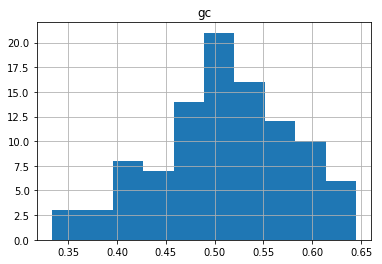

In [86]:
# plot simple historgram
result_df.hist()

Now that you saw how to do it for one species, you can do the same for human and zebrafish and plot them together. You can merge pandas dataframes using `pd.concat`. Check the documentary for help. 

In [101]:
files = ['Danio_rerio.GRCz11.98.gff3.gz', 'Homo_sapiens.GRCh38.98.gff3.gz',  'Mus_musculus.GRCm38.98.gff3.gz']
species =  ['Zebrafish', 'Human', 'Mouse']

In [110]:
print("only scroll down If you want to see my solution. Else work in here")

only scroll down If you want to see my solution. Else work in here


In [111]:
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#


In [123]:
## Solution
class gffsample(gff3):
    '''
    this class inherits the functionality of the gff class and 
    expands it with new functionality for sampeling. But relies on outside functions
    for computing gc and fetching the data.
    Would be nice to include these into this class.
    '''
    def __init__(self, path, species = "human"):
        '''
        When initialized the class will always execute this __init__ function.
        So whatever we do here, will always be done.
        '''
        self.path = path
        # filter
        self.load()
        # also filter this time
        self.df = self.filter()
        # set the species
        self.species = species
        self.df_gc_created = False
    
    def sample(self, n = 100):
        self.sampled = self.df.sample(n)
    
    def make_GC(self):
        res = []
        for index, row in self.sampled.iterrows():
            # fetch the sequence using the esemble API
            seq = get_genomic_content(row.seqid, row.start, row.end, species = self.species)
            # calculate the GC content
            gc = calculateGC(seq)
            # create a dictionary for each result
            result = {'species': self.species,
                      'gc': gc}
            # and save this in out result list
            res.append(result)
        # transform the dictionary into a data frame
        self.df_gc = pd.DataFrame(res)
    
    def get_GC(self):
        # if not done already compute the GC content by querying the esemble api
        if self.df_gc_created == False:
            self.make_GC()
            self.df_gc_created = True
        
        return self.df_gc
        

In [124]:
dataframes = []
for file, specie in zip(files, species):
    print(f'Sampeling file: {file} ({specie})')
    g = gffsample(f'data/{file}', species = specie)
    g.sample(100)
    dataframes.append(g.get_GC())

Samepling for Danio_rerio.GRCz11.98.gff3.gz of Zebrafish
Samepling for Homo_sapiens.GRCh38.98.gff3.gz of Human
Samepling for Mus_musculus.GRCm38.98.gff3.gz of Mouse


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f84f8078dd8>,
      dtype=object)

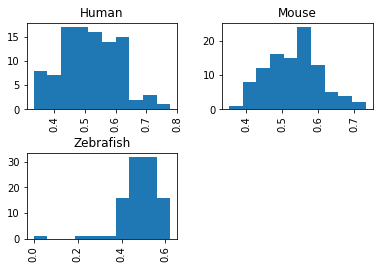

In [125]:
pd.concat(dataframes).hist(by = "species")